In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.tail(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7024,7398-LXGYX,Male,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,No
7025,2823-LKABH,Female,0,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.05,1679.4,No
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
#to see other columns
df1=df.drop(columns=['customerID','gender'])
df1.tail(20)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7023,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7024,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,No
7025,0,No,No,18,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.05,1679.4,No
7026,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7027,0,No,No,13,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
7028,0,Yes,No,68,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7029,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7031,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7032,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**gender**

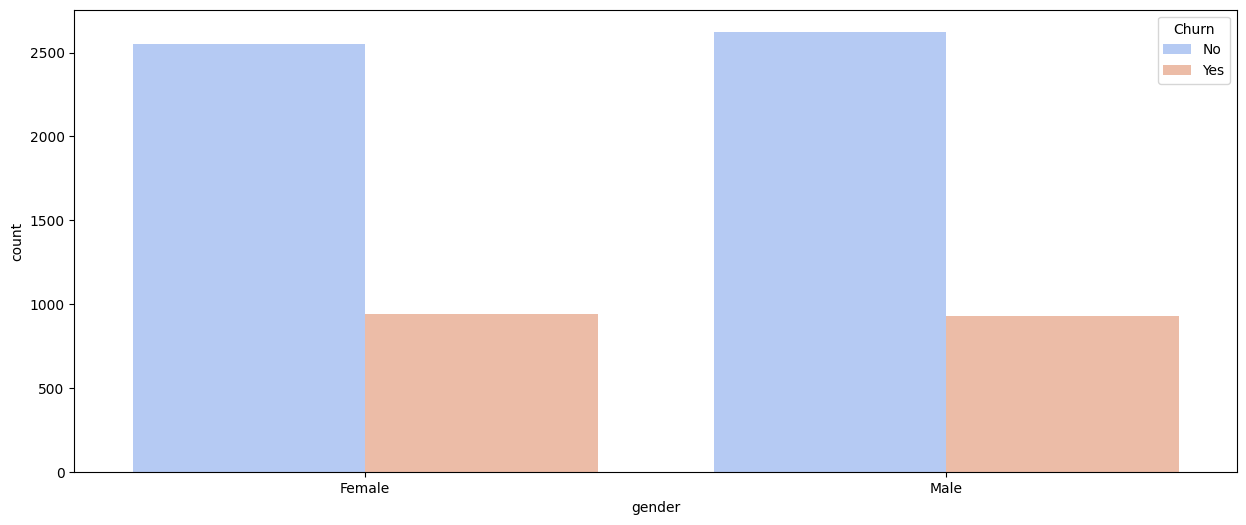

In [13]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="gender", hue="Churn", palette='coolwarm')
plt.show()

**SeniorCitizen**

In [14]:
# Indicates if the customer is 65 or older
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


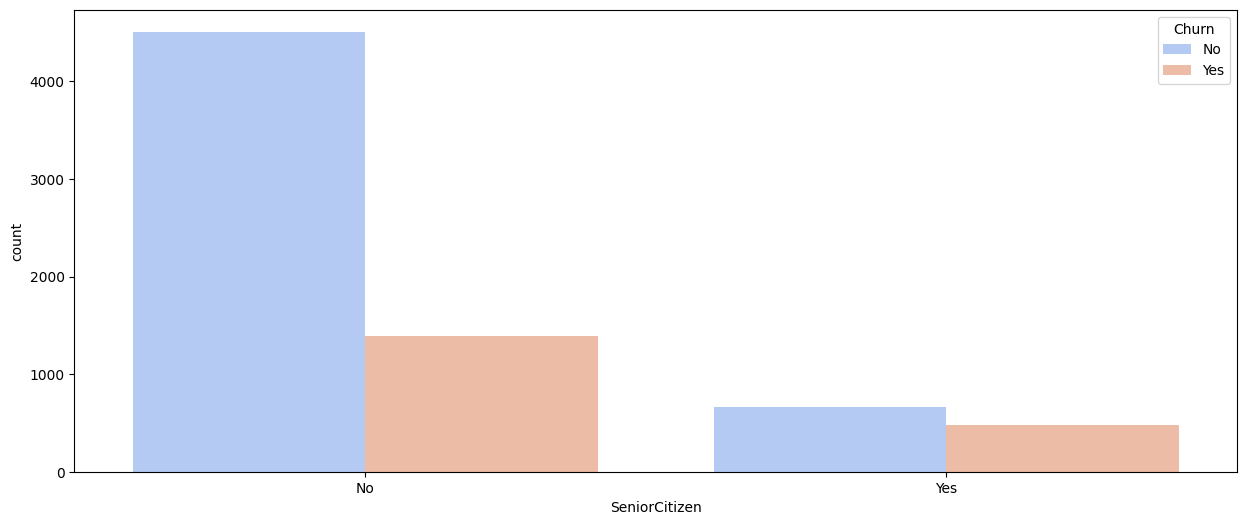

In [15]:
#Senior Citizen: Indicates if the customer is 65 or older: Yes, No
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", palette='coolwarm')
plt.show()

**Most of the senior citizens churn**



**Parter**

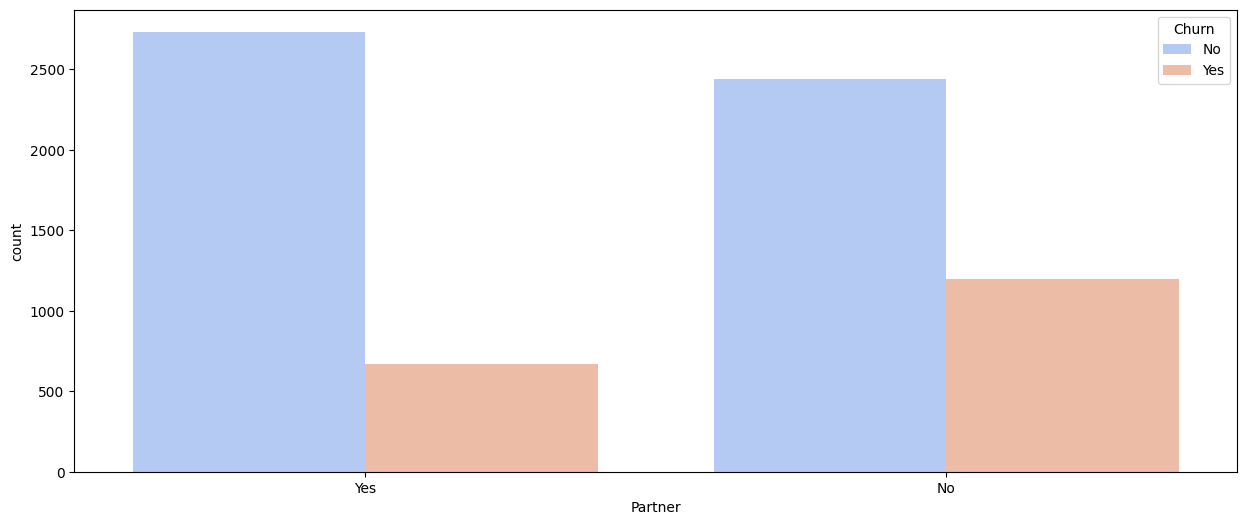

In [16]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="Partner", hue="Churn", palette='coolwarm')
plt.show()

Customers that doesn't have partners are more likely to churn


**Dependents**

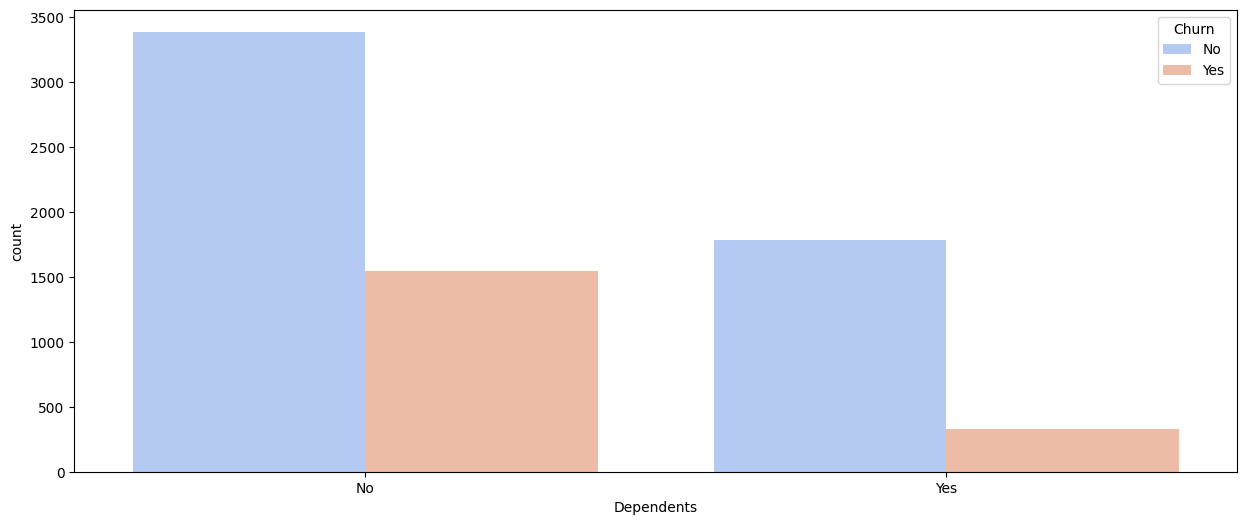

In [17]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="Dependents", hue="Churn", palette='coolwarm')
plt.show()

Customers without dependents are more likely to churn

**Tenure Months**

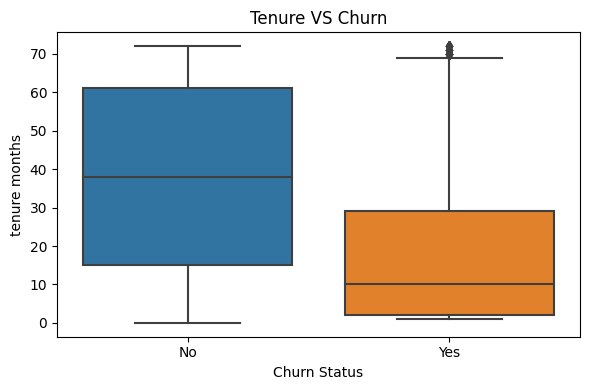

In [18]:
# the total amount of months that the customer has been with the company by the end of the quarter specified above
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure VS Churn')
plt.xlabel('Churn Status')
plt.ylabel('tenure months')
plt.tight_layout()
plt.show()

New customers are more likely to churn

<Figure size 1200x800 with 0 Axes>

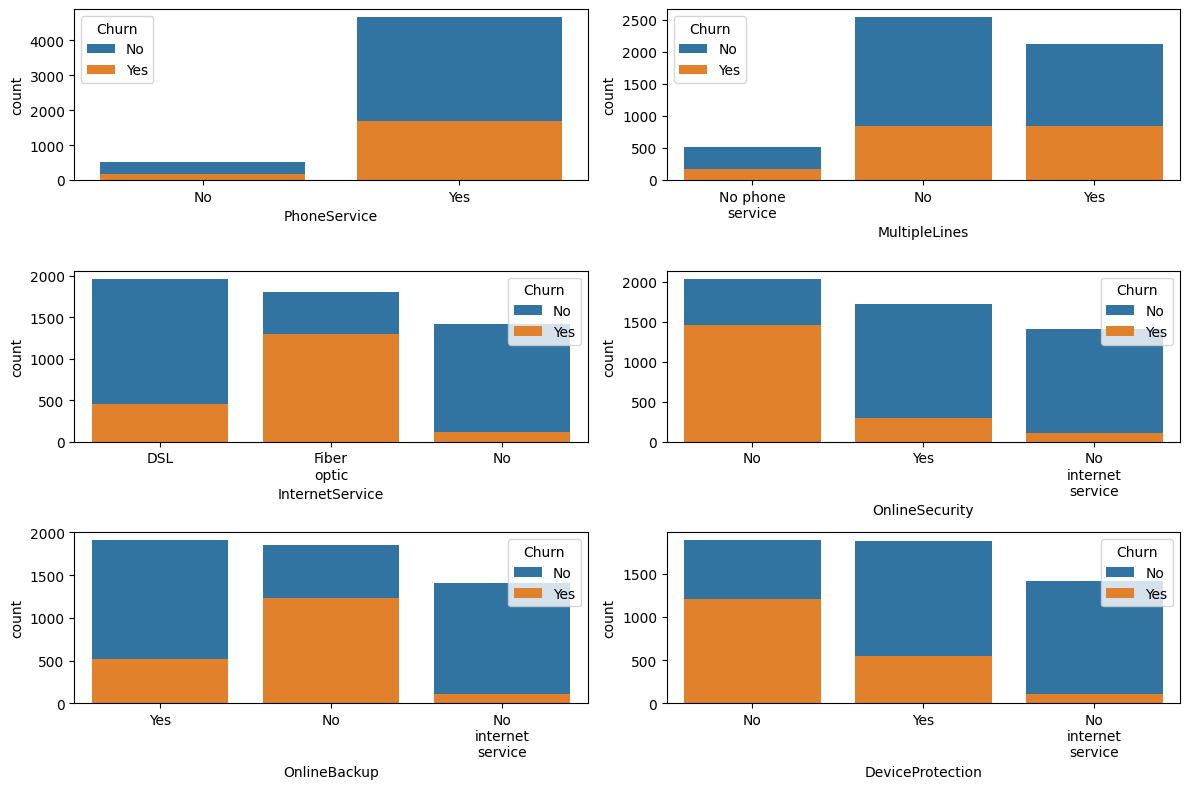

In [19]:
plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]
# PhoneService vs Churn
sns.countplot(x='PhoneService', hue='Churn', data=df, ax=axes[0, 0], dodge=False)
axes[0, 0].set_xticklabels(wrap_labels(df['PhoneService'].unique(), 10))
# MultipleLines vs Churn
sns.countplot(x='MultipleLines', hue='Churn', data=df, ax=axes[0, 1], dodge=False)
axes[0, 1].set_xticklabels(wrap_labels(df['MultipleLines'].unique(), 10))
# InternetService vs Churn
sns.countplot(x='InternetService', hue='Churn', data=df, ax=axes[1, 0], dodge=False)
axes[1, 0].set_xticklabels(wrap_labels(df['InternetService'].unique(), 10))
# OnlineSecurity vs Churn
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, ax=axes[1, 1], dodge=False)
axes[1, 1].set_xticklabels(wrap_labels(df['OnlineSecurity'].unique(), 10))
# OnlineBackup vs Churn
sns.countplot(x='OnlineBackup', hue='Churn', data=df, ax=axes[2, 0], dodge=False)
axes[2, 0].set_xticklabels(wrap_labels(df['OnlineBackup'].unique(), 10))
# DeviceProtection vs Churn
sns.countplot(x='DeviceProtection', hue='Churn', data=df, ax=axes[2, 1], dodge=False)
axes[2, 1].set_xticklabels(wrap_labels(df['DeviceProtection'].unique(), 10))
plt.tight_layout()
plt.show()

Churn rate is much higher in case of Fiber Optic InternetServices.

Customers who do not have services like No OnlineSecurity, OnlineBackup and DeviceProtection have left the platform in the past month.

<Figure size 1200x800 with 0 Axes>

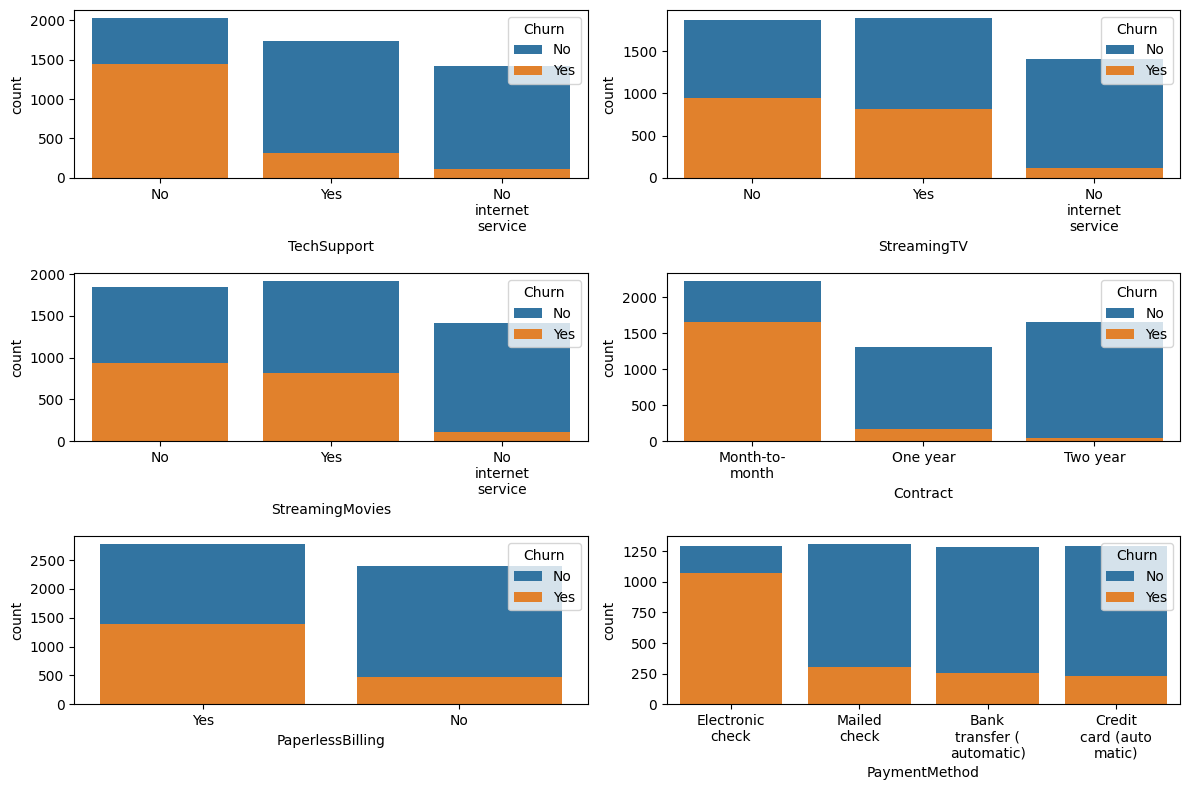

In [20]:
plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]
# TechSupport vs Churn
sns.countplot(x='TechSupport', hue='Churn', data=df, ax=axes[0, 0], dodge=False)
axes[0, 0].set_xticklabels(wrap_labels(df['TechSupport'].unique(), 10))
# StreamingTV vs Churn
sns.countplot(x='StreamingTV', hue='Churn', data=df, ax=axes[0, 1], dodge=False)
axes[0, 1].set_xticklabels(wrap_labels(df['StreamingTV'].unique(), 10))
# StreamingMovies vs Churn
sns.countplot(x='StreamingMovies', hue='Churn', data=df, ax=axes[1, 0], dodge=False)
axes[1, 0].set_xticklabels(wrap_labels(df['StreamingMovies'].unique(), 10))
# Contract vs Churn
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[1, 1], dodge=False)
axes[1, 1].set_xticklabels(wrap_labels(df['Contract'].unique(), 10))
# PaperlessBilling vs Churn
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, ax=axes[2, 0], dodge=False)
axes[2, 0].set_xticklabels(wrap_labels(df['PaperlessBilling'].unique(), 10))
# PaymentMethod vs Churn
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[2, 1], dodge=False)
axes[2, 1].set_xticklabels(wrap_labels(df['PaymentMethod'].unique(), 10))
plt.tight_layout()
plt.show()

Customers who don't have TechSupport are more likely to churn

Churn percent is higher in case of cutsomers with monthlySubscription

Churn percent is higher in case of cutsomers having paperlessbilling option.

Customers who have PaymentMethod ElectronicCheck are more likely to churn

MonthlyCharges

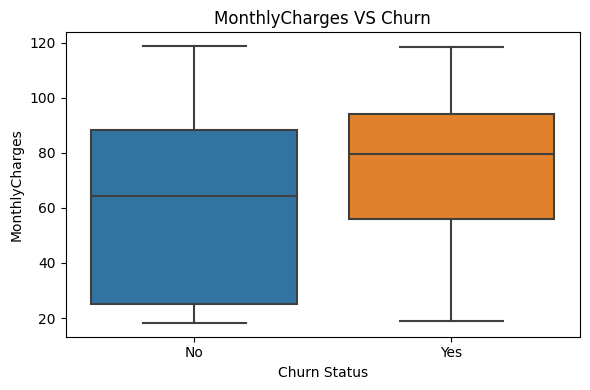

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('MonthlyCharges VS Churn')
plt.xlabel('Churn Status')
plt.ylabel('MonthlyCharges')
plt.tight_layout()
plt.show()

Customers who have churned, have high monthly charges above 75

**TotalCharges**

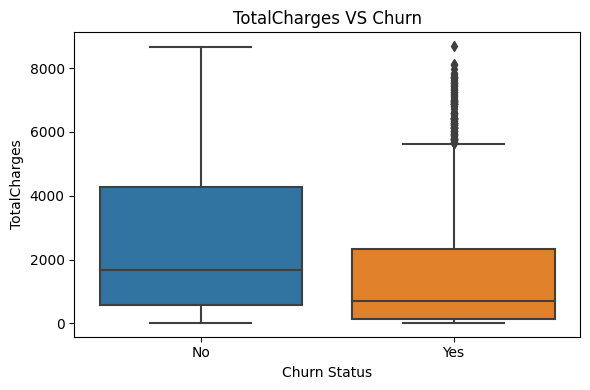

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('TotalCharges VS Churn')
plt.xlabel('Churn Status')
plt.ylabel('TotalCharges')
plt.tight_layout()
plt.show()

Total charges of customers who have churned is low

In [23]:
df=df.drop(columns=['customerID','gender','MultipleLines','StreamingTV','StreamingMovies','PhoneService'])
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,No,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,No,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Yes,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [24]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')

In [25]:
df.describe(include=['object'])

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,3,2,2,2,2,3,2,4,2
top,No,No,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,5901,3641,4933,3096,5024,4614,4621,4999,3875,4171,2365,5174


In [26]:
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,No,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,No,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Yes,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [27]:
columns_to_convert = ['SeniorCitizen', 'Partner', 'Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling','Churn']
df[columns_to_convert] = df[columns_to_convert].replace({'Yes': 1, 'No': 0})
df

/tmp/ipykernel_17/3841399203.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace({'Yes': 1, 'No': 0})


,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,DSL,0,1,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,DSL,1,0,1,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,DSL,1,1,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,DSL,1,0,1,1,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,Fiber optic,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,DSL,1,0,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,1,72,Fiber optic,0,1,1,0,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,1,11,DSL,1,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,0,4,Fiber optic,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [28]:
columns_to_encode = ['InternetService', 'Contract', 'PaymentMethod']
df=pd.get_dummies(df, columns=columns_to_encode)
df

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,0,1,29.85,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,0,56.95,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,1,0,0,1,53.85,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,1,0,1,1,0,42.30,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,0,0,0,0,1,70.70,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,0,1,1,1,84.80,...,True,False,False,False,True,False,False,False,False,True
7039,0,1,1,72,0,1,1,0,1,103.20,...,False,True,False,False,True,False,False,True,False,False
7040,0,1,1,11,1,0,0,0,1,29.60,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,0,4,0,0,0,0,1,74.40,...,False,True,False,True,False,False,False,False,False,True


In [29]:
columns_to_scale = ['TotalCharges', 'MonthlyCharges', 'tenure']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.277445,0,1,0,0,1,-1.160323,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0.066327,1,0,1,0,0,-0.259629,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,-1.236724,1,1,0,0,1,-0.362660,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0.514251,1,0,1,1,0,-0.746535,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,-1.236724,0,0,0,0,1,0.197365,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,-0.340876,1,0,1,1,1,0.665992,...,True,False,False,False,True,False,False,False,False,True
7039,0,1,1,1.613701,0,1,1,0,1,1.277533,...,False,True,False,False,True,False,False,True,False,False
7040,0,1,1,-0.870241,1,0,0,0,1,-1.168632,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,0,-1.155283,0,0,0,0,1,0.320338,...,False,True,False,True,False,False,False,False,False,True


In [30]:
X=df.drop(columns='Churn')
y=df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.26%


In [31]:
X_test.shape

(1409, 21)

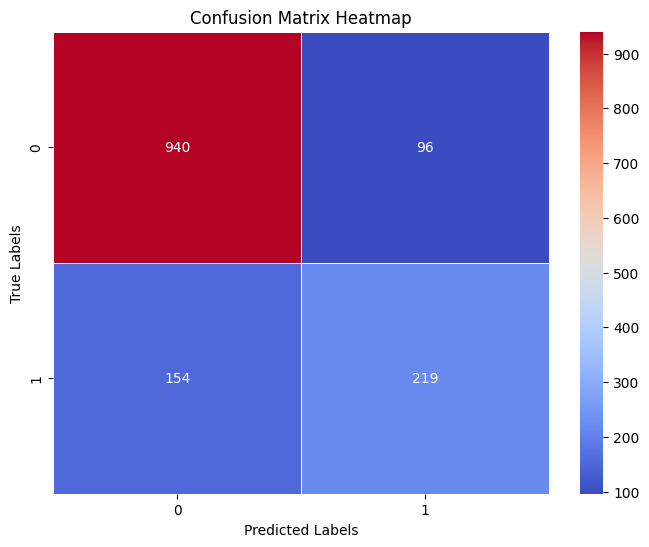

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='g')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Credit:

https://www.kaggle.com/code/mazenalattar/customer-churn-classification-logisticregression